<a href="https://colab.research.google.com/github/valogonor/Picasso-Painted-It/blob/master/Picasso_Painted_It.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # performance timing

# Building on Keras
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [0]:
import imageio
import matplotlib.pyplot as plt
from skimage import color

example_painting = imageio.imread('drive/My Drive/Colab Notebooks/Picasso Painted It/resized1/1.jpg')

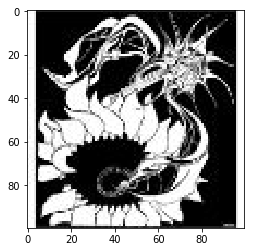

In [4]:
plt.imshow(example_painting);

In [5]:
example_painting.shape

(100, 100, 3)

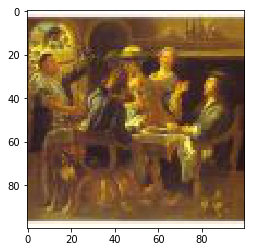

In [6]:
example2 = imageio.imread('drive/My Drive/Colab Notebooks/Picasso Painted It/resized1/10.jpg')
plt.imshow(example2);

In [7]:
example2.shape

(100, 100, 3)

In [0]:
example3 = imageio.imread('drive/My Drive/Colab Notebooks/Picasso Painted It/resized1/100.jpg')

In [9]:
example3.shape

(100, 100, 3)

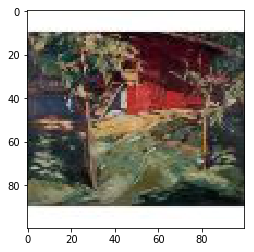

In [10]:
plt.imshow(example3);

In [0]:
example4 = imageio.imread('drive/My Drive/Colab Notebooks/Picasso Painted It/resized1/1000.jpg')

In [12]:
example4.shape

(100, 100, 3)

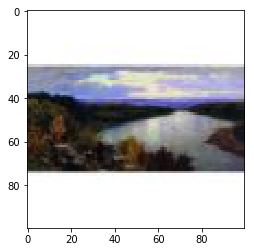

In [13]:
plt.imshow(example4);

In [0]:
np.random.seed(10)
random_dim = 100
 
def load_painting_data():
  
    x_train = np.empty((100, 100, 3))
    x_train = np.expand_dims(x_train, axis=0)

    # Load the image and convert to np.array 
    for image in os.listdir('drive/My Drive/Colab Notebooks/Picasso Painted It/resized1'):
        painting_array = imageio.imread('drive/My Drive/Colab Notebooks/Picasso Painted It/resized1/'+image)
        x_train = np.concatenate((x_train,
                                  painting_array[np.newaxis,:,:]),axis=0)

    print(x_train.shape)
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    # convert x_train with a shape of (1001, 100, 100, 3) to (1001, 30000) so we have
    # 30000 columns per row
    x_train = x_train.reshape(1001, 30000)

    return x_train

In [0]:
def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(
        1024, input_dim=30000,
        kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
 
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
 
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
 
    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(
        256, input_dim=random_dim,
        kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))
 
    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))
 
    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))
 
    generator.add(Dense(30000, activation='tanh'))
    # generator.add(Dense(30000, activation='sigmoid'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

def get_gan_network(discriminator, random_dim, generator, optimizer):
    # We initially set trainable to False since we only want to train either the 
    # generator or discriminator at a time
    discriminator.trainable = False
    # gan input (noise) will be 100-dimensional vectors
    gan_input = Input(shape=(random_dim,))
    # the output of the generator (an image)
    x = generator(gan_input)
    # get the output of the discriminator (probability if the image is real/not)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

def plot_generated_images(epoch, generator, examples=100, dim=(10, 10),
                          figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 100, 100, 3)
 
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow((generated_images[i]*255).astype(np.uint8), 
                   interpolation='nearest', cmap='gray_r')
        # plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

(1001, 100, 100, 3)


W0717 22:45:36.574146 140644975839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 22:45:36.576991 140644975839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 22:45:36.583994 140644975839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0717 22:45:36.611855 140644975839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 22:45:36.664582 140644975839104 deprecation_wra

--------------- Epoch 1 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 2 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 3 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 4 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 5 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 6 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 7 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 8 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 9 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 10 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 11 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 12 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 13 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 14 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 15 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 16 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 17 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 18 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 19 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 20 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 21 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 22 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 23 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 24 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 25 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 26 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 27 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 28 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 29 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 30 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 31 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 32 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 33 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 34 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 35 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 36 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 37 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 38 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 39 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 40 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 41 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 42 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 43 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 44 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 45 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 46 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 47 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 48 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 49 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 50 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 51 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 52 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 53 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 54 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 55 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 56 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 57 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 58 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 59 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 60 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 61 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 62 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 63 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 64 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 65 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 66 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 67 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 68 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 69 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 70 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 71 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 72 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 73 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 74 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 75 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 76 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 77 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 78 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 79 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 80 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 81 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 82 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 83 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 84 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 85 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 86 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 87 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 88 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 89 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 90 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 91 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 92 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 93 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 94 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 95 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 96 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 97 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 98 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 99 ---------------


  0%|          | 0/31 [00:00<?, ?it/s]

--------------- Epoch 100 ---------------


100%|██████████| 31/31 [00:42<00:00,  1.36s/it]


CPU times: user 2h 15min 39s, sys: 2min 29s, total: 2h 18min 8s
Wall time: 1h 15min 4s


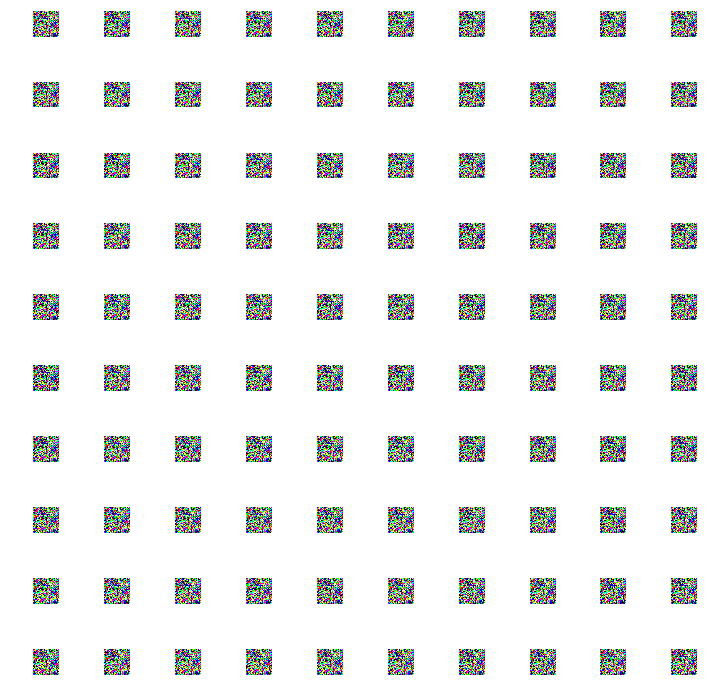

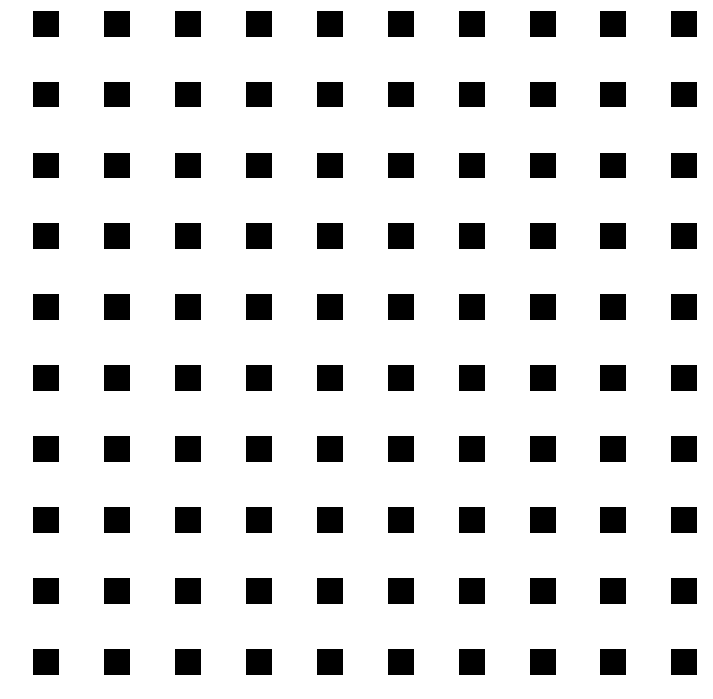

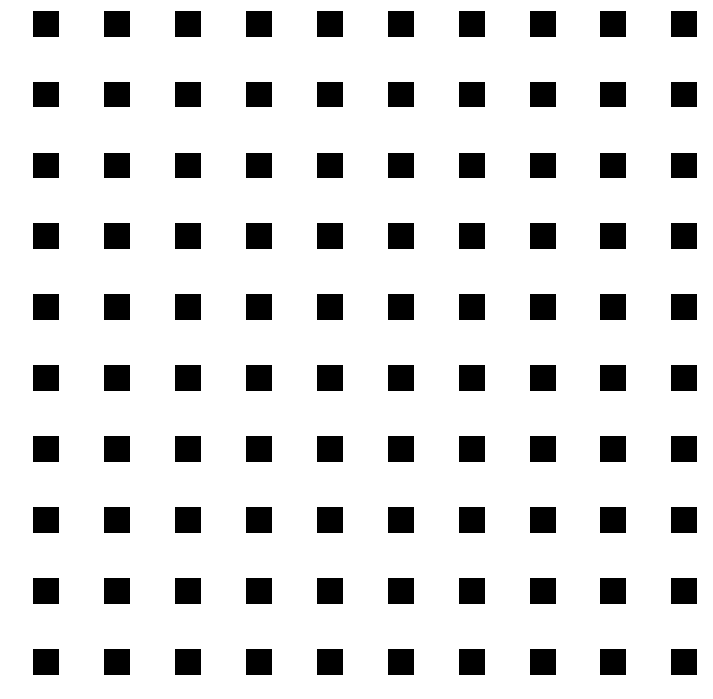

In [16]:
%%time

def train(epochs=1, batch_size=128):
    # Get the training and testing data
    x_train = load_painting_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] // batch_size
 
    # Build our GAN netowrk
    adam = Adam(lr=0.0002, beta_1=0.5)
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)
 
    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batch_count)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0],
                                                    size=batch_size)]
 
            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])
 
            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9
 
            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)
 
            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)
 
        if e == 1 or e % 40 == 0:
            plot_generated_images(e, generator)

train(100, 32)